In [1]:
## 1. 임포트 라이브러리

from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
## 2. 셀레늄 구동 - 크롬 드라이버
browser = webdriver.Chrome('C:\data-science\chromedriver.exe')
url = 'https://www.istarbucks.co.kr/store/store_map.do?disp=locale'
browser.get(url)

In [3]:
## 3. 서울 및 전체 버튼 css selector
#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a

In [4]:
## 3.1 서울 찾기
seoul_btn = '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
browser.find_element_by_css_selector(seoul_btn).click()


In [5]:
## 3.2 전체 선택
all_btn = '#mCSB_2_container > ul > li:nth-child(1) > a'
browser.find_element_by_css_selector(all_btn).click()


In [6]:
## 4. BeautifulSoup : HTML 파싱

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [7]:
soup

<html lang="ko"><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="website" property="og:type"/>
<meta content="Starbucks" property="og:title"/>
<meta content="https://www.starbucks.co.kr/" property="og:url"/>
<meta content="https://image.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
<meta content="Starbucks" property="og:description"/>
<title id="titleJoin">Starbucks Coffee Korea</title>
<link href="https://image.istarbucks.co.kr/common/img/common/favicon.ico?v=200828" rel="shortcut icon" type="image/ico"/> <!-- 20200827 파비콘 교체 및 CDN 변수처리 -->
<link href="/common/css/reset.css" rel="stylesheet"/>
<link href="/common/css/style.css?v=200130" rel="stylesheet"/>
<link href="/common/css/jquery.bxslider.css" rel="stylesheet"/>
<link href="/common/css/idangerous.swiper.css" rel="stylesheet"/>
<link 

In [8]:
## 5. select로 적절한 태그의 정보 가져오기

starbucks_soup_list = soup.select('li.quickResultLstCon')
print(len(starbucks_soup_list))

552


In [9]:
starbucks_soup_list[0]

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [10]:
print(starbucks_soup_list[0].prettify())

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff">
 <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">
  역삼아레나빌딩
 </strong>
 <p class="result_details">
  서울특별시 강남구 언주로 425 (역삼동)
  <br/>
  1522-3232
 </p>
 <i class="pin_general">
  리저브 매장 2번
 </i>
</li>



In [11]:
soup.find_all('li.quickResultLstCon' > 'a')

[<html lang="ko"><head>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta charset="utf-8"/>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
 <meta content="website" property="og:type"/>
 <meta content="Starbucks" property="og:title"/>
 <meta content="https://www.starbucks.co.kr/" property="og:url"/>
 <meta content="https://image.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
 <meta content="Starbucks" property="og:description"/>
 <title id="titleJoin">Starbucks Coffee Korea</title>
 <link href="https://image.istarbucks.co.kr/common/img/common/favicon.ico?v=200828" rel="shortcut icon" type="image/ico"/> <!-- 20200827 파비콘 교체 및 CDN 변수처리 -->
 <link href="/common/css/reset.css" rel="stylesheet"/>
 <link href="/common/css/style.css?v=200130" rel="stylesheet"/>
 <link href="/common/css/jquery.bxslider.css" rel="stylesheet"/>
 <link href="/common/css/idangerous.swiper.css" rel="style

In [12]:
## .text vs .string
starbucks_soup_list[0].text

' 역삼아레나빌딩   서울특별시 강남구 언주로 425 (역삼동)1522-3232 리저브 매장 2번'

In [13]:
starbucks_soup_list[0].get_text()

' 역삼아레나빌딩   서울특별시 강남구 언주로 425 (역삼동)1522-3232 리저브 매장 2번'

In [14]:
starbucks_soup_list[0].string
## 여러개라서 결과가 string이 안먹음

In [15]:
soup.select('i.pin_general')[0].string
## 하나라서 텟스트 스트링 다 먹음

'리저브 매장 2번'

In [16]:
soup.select('i.pin_general')[0].text

'리저브 매장 2번'

In [17]:
## 1. 매장명

In [18]:
starbucks_soup_list[0]['data-name']
## 뷰티풀숩 내의 키 이름으로 데이터 뽑아낼 수 있다.

'역삼아레나빌딩'

In [19]:
## 2. 위도 경도
starbucks_soup_list[0]['data-lat']

'37.501087'

In [20]:
starbucks_soup_list[0]['data-long']

'127.043069'

In [21]:
## 3. 매장 타입 -> i tag에 있음
starbucks_soup_list[0].find('i')['class'][0][4:]

'general'

In [22]:
starbucks_soup_list[4].find('i')['class'][0][4:]

'reserve'

In [23]:
## 4.주소   & 5.전화번호
starbucks_soup_list[0].select('p.result_details')[0].text

'서울특별시 강남구 언주로 425 (역삼동)1522-3232'

In [24]:
starbucks_soup_list[0].select('p.result_details')[0].text[:-9]

'서울특별시 강남구 언주로 425 (역삼동)'

In [25]:
starbucks_soup_list[0].select('p.result_details')[0].text[-9:]

'1522-3232'

In [26]:
## 6. 주소 전화번호 번외편
temp = starbucks_soup_list[0].select('p.result_details')[0]
temp

<p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p>

In [27]:
str(temp).split('<br/>')[1][:-4]

'1522-3232'

In [28]:
str(temp).split('<br/>')[0][26:]

'서울특별시 강남구 언주로 425 (역삼동)'

---

## post 방식 크롤링

### 목표 : 한국금거래소의 일별 금 가격 전체 데이터를 수집, (2008~현재)하여 시각화하고
### 시기별 특정 이벤트를 annotation하여 가격변동과의 관계를 살펴본다

In [30]:
## 2. 셀레늄 구동 - 크롬 드라이버
browser = webdriver.Chrome('C:\data-science\chromedriver.exe')
url = 'https://www.koreagoldx.co.kr/'
browser.get(url)

In [31]:
first_btn = '#contents > div.sub_content > div.main_cont.main_data_cont > div:nth-child(1) > div.main_data_cont_block.left > h3 > a'
browser.find_element_by_css_selector(first_btn).click()


In [32]:
second_btn = '#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label'
browser.find_element_by_css_selector(second_btn).click()


In [33]:

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [34]:
soup.select('div.tabulator')[0]

<div class="tabulator" id="example-table" role="grid" tabulator-layout="fitColumns"><div class="tabulator-header" style="padding-right: 0px;"><div class="tabulator-headers" style="margin-left: 0px;"><div aria-sort="none" class="tabulator-col" role="columnheader" style="min-width: 40px; width: 170px; height: 82px; padding-top: 20.5px;" tabulator-field="writeday" title=""><div class="tabulator-col-content"><div class="tabulator-col-title">고시날짜</div></div></div><div aria-sort="none" aria-title="내가 살 때(3.75g)" class="tabulator-col tabulator-col-group" role="columngroup" style="height: 82px;" title=""><div class="tabulator-col-content" style="max-width: 226px;"><div class="tabulator-col-title">내가 살 때(3.75g)</div></div><div class="tabulator-col-group-cols" style="min-height: 41px;"><div aria-sort="none" class="tabulator-col" role="columnheader" style="min-width: 40px; height: 41px; padding-top: 0.5px; width: 227px;" tabulator-field="spure" title=""><div class="tabulator-col-content"><div cla

In [54]:
## 교수님

import urllib.request as req
import pandas as pd
import requests
from selenium import webdriver
import time
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import re

## 1-1. 웹 페이지 소스 데이터 가져오기 : requests
#### 한국금거래소는 post 방식으로 클라이언트의 요청에 
#### response 하므로 먼저 requests모듈을 이용하여 
#### head 정보 및 data, params를 함께 전달하여 
#### 페이지 소스 획득이 가능한지 살펴본다.

[requests docs](https://docs.python-requests.org/en/master/user/quickstart/)

In [37]:
# 금 시세 테이블 있는 url
url_target = 'https://koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'

[header 및 payload]

In [39]:
header = {'User-Agent':'Mozilla/5.0'} # request header에서 찾음

In [46]:
payload = {'srchDt' : 'ALL',
          'type':'Au',
          'dataDateStart' : '2008.03.11',
          'dataDateEnd':'2021.05.06'}
# 맨아래 request payload에서 가져온 것들

[헤더와 페이로드 포함한 페이지 요청 및 response]

In [41]:
rr = requests.post(url_target, headers = header, data = payload)

[응답 페이지 소스 파싱하기]

In [42]:
soup_test = BeautifulSoup(rr.content, 'html.parser')

In [43]:
print(soup_test.prettify())

<!DOCTYPE doctype html>
<html>
 <head>
  <title>
   한국금거래소 - 대한민국 금거래의 중심
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="한국금거래소" name="author"/>
   <meta content="오늘의 금시세(금값시세), 은시세, 금매입, 관련 시세 정보 제공으로 투명한 거래에 앞장서고 있습니다.." name="description"/>
   <meta content="금시세,금값,금값시세, 금매입, 국제금값,은값,은시세,골드바,실버바, 금, 한국금, 포나인, 고가매입, 조폐공사, 금괴, 투자, 오늘의금시세, 금테크, 재테크, 선물, 금화, 은화, 은테크," name="keywords"/>
   <meta content="MTYyNDI4NDE0MzgzNzI2MzQ1NTgwNzExNjYxNzg3MTA4ODM3MDAyODE5" name="csrf-token"/>
   <meta content="website" property="og:type"/>
   <meta content="한국금거래소" property="og:title"/>
   <meta content="https://koreagoldx.co.kr/data/common/snsRepresentImage.jpg" property="og:image"/>
   <meta content="https://koreagoldx.co.kr/main/html.php?agencyCode=&amp;htmid=goods/gold_list.html" property="og:url"/>
   <meta content="대한민국 금거래의 중심" property="og:description"/>
   <meta content="ko_KR" prope

헤더와 payload를 포함하여 페이지를 요청하였으나 우리가 필요한 테이블 데이터는  
html에 포함되어 있지 않으며 자바스크립트로 동적 구성되어 있다.

`<!-- 시세조회 스크립트 -->` 윗 부분 `<div id="example-table">` 확인

**<u>이런 경우 selenium을 이용하여 동적 크롤링하면 우리가 보는 웹 페이지의 소스 정보  
모두를 얻어올 수 있다.</u>**

In [44]:
## 실제 페이지 데이터가 아니라 자바만 온거임
## 적절한 바디를 구성하기 쉽지 않다, 
## 문제는 그걸 해내야 원하는 걸 받아올 수 있다
## 그건 post 웹 마다 다르니까... 
## 차라리 보이는 대로 다 가져오는 걸 할거다
## --> selenium

In [45]:
## 1. 전체 데이터 수집 및 데이터프레임 정리
## 2. 셀레늄 페이지 넘길 때 time.sleep() 사용
## -time.sleep(2)

### 1-2. 웹 페이지 소스 데이터 가져오기 : selenium

In [47]:
from selenium import webdriver
driver=webdriver.Chrome('C:\data-science\chromedriver.exe')

In [48]:
url='https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html'

구동한 크롬드라이버의 get()메서드에 url을 전달하여 페이지 요청 및 응답 받음

In [49]:
driver.get(url)

구동 중인 크롬브라우저에서 해당 웹페이지의 필요 정보 클릭  
--> **css selector 활용하여 `전체` 클릭**

In [50]:
#example-table > div.tabulator-footer > span > span > button:nth-child(1)
#example-table > div.tabulator-footer > span > span > button:nth-child(2)

In [51]:
all_element= driver.find_element_by_css_selector('#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label')

In [52]:
all_element.click()

[필요 데이터 접근 가능여부 확인]  
응답 받은 페이지 소스 정보에서 find_element_by_class_name() 이용하여 필요 데이터 수집 가능한지 확인

In [56]:
data_test = driver.find_element_by_class_name('tabulator-table')

In [57]:
data_test.text

'2021.06.21281,500265,000190,800147,100\n2021.06.19280,000264,500190,500146,800\n2021.06.18283,000266,000191,600147,700\n2021.06.17287,000269,000193,700149,300\n2021.06.16289,500269,500194,100149,600\n2021.06.15290,000269,000193,700149,300\n2021.06.14289,000269,000193,700149,300\n2021.06.12291,500271,000195,200150,500\n2021.06.11293,000272,000195,900151,000\n2021.06.10292,000272,000195,900151,000\n2021.06.09293,000272,500196,200151,300\n2021.06.08293,000274,000197,300152,100\n2021.06.07292,000273,500197,000151,800\n2021.06.05292,000274,000197,300152,100\n2021.06.04291,000273,000196,600151,600'

위와 같이 `find_element_by_class_name('tabulator-table')`에 접근했을 때 첫 페이지의 시세 테이블에 있는  
모든 데이터 15개 수집됨

이제 페이지를 넘겨가며 모든 데이터를 수집하면 된다

페이지 넘기기는 `>` next page 버튼을 활용하기로 결정

[next page 클릭 확인]  
css_selector : #example-table > div.tabulator-footer > span > button:nth-child(4)

In [58]:
click_element = driver.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')

In [59]:
click_element.click()

### [전체 데이터 수집]

In [61]:
import time

In [62]:
int(driver.find_element_by_id('tatalMarket').text)

4038

In [63]:
page_num = np.ceil(int(driver.find_element_by_id('tatalMarket').text)/15)

In [64]:
page_num

270.0

In [65]:
text = ""
i = 1
while i < (page_num+1):
    data_test = driver.find_element_by_class_name('tabulator-table')
    text += data_test.text + '\n'
    click_element = driver.find_element_by_css_selector('#example-table > div.tabulator-footer > span > button:nth-child(4)')
    click_element.click()
    time.sleep(2)
    print("{}페이지 수집 중".format(i))
    i = i + 1
    if i == page_num:
        print("마지막 페이지")

1페이지 수집 중
2페이지 수집 중
3페이지 수집 중
4페이지 수집 중
5페이지 수집 중
6페이지 수집 중
7페이지 수집 중
8페이지 수집 중
9페이지 수집 중
10페이지 수집 중
11페이지 수집 중
12페이지 수집 중
13페이지 수집 중
14페이지 수집 중
15페이지 수집 중
16페이지 수집 중
17페이지 수집 중
18페이지 수집 중
19페이지 수집 중
20페이지 수집 중
21페이지 수집 중
22페이지 수집 중
23페이지 수집 중
24페이지 수집 중
25페이지 수집 중
26페이지 수집 중
27페이지 수집 중
28페이지 수집 중
29페이지 수집 중
30페이지 수집 중
31페이지 수집 중
32페이지 수집 중
33페이지 수집 중
34페이지 수집 중
35페이지 수집 중
36페이지 수집 중
37페이지 수집 중
38페이지 수집 중
39페이지 수집 중
40페이지 수집 중
41페이지 수집 중
42페이지 수집 중
43페이지 수집 중
44페이지 수집 중
45페이지 수집 중
46페이지 수집 중
47페이지 수집 중
48페이지 수집 중
49페이지 수집 중
50페이지 수집 중
51페이지 수집 중
52페이지 수집 중
53페이지 수집 중
54페이지 수집 중
55페이지 수집 중
56페이지 수집 중
57페이지 수집 중
58페이지 수집 중
59페이지 수집 중
60페이지 수집 중
61페이지 수집 중
62페이지 수집 중
63페이지 수집 중
64페이지 수집 중
65페이지 수집 중
66페이지 수집 중
67페이지 수집 중
68페이지 수집 중
69페이지 수집 중
70페이지 수집 중
71페이지 수집 중
72페이지 수집 중
73페이지 수집 중
74페이지 수집 중
75페이지 수집 중
76페이지 수집 중
77페이지 수집 중
78페이지 수집 중
79페이지 수집 중
80페이지 수집 중
81페이지 수집 중
82페이지 수집 중
83페이지 수집 중
84페이지 수집 중
85페이지 수집 중
86페이지 수집 중
87페이지 수집 중
88페이지 수집 중
89페이지 수집 중
90페이지 수집 중
91페이지 수집 중
92페이지 수집

In [66]:
text

'2021.06.03294,500275,000198,000152,700\n2021.06.02292,500275,000198,000152,700\n2021.06.01293,500275,000198,000152,700\n2021.05.31293,500275,000198,000152,700\n2021.05.29294,500275,500198,400153,000\n2021.05.28293,500275,000198,000152,700\n2021.05.27294,500276,000198,800153,200\n2021.05.26295,500275,500198,400153,000\n2021.05.25293,000273,000196,600151,600\n2021.05.24295,000274,000197,300152,100\n2021.05.22295,000274,000197,300152,100\n2021.05.21293,000273,500197,000151,800\n2021.05.20295,000273,500197,000151,800\n2021.05.19293,000272,500196,200151,300\n2021.05.18293,000272,500196,200151,300\n2021.05.17292,000272,000195,900151,000\n2021.05.15289,000268,000193,000148,800\n2021.05.14288,000267,000192,300148,200\n2021.05.13285,500266,000191,600147,700\n2021.05.12286,500266,000191,600147,700\n2021.05.11285,500266,000191,600147,700\n2021.05.10285,000265,500191,200147,400\n2021.05.08284,000263,500189,800146,300\n2021.05.07284,000263,000189,400146,000\n2021.05.06282,000261,500188,300145,200\

In [67]:
len(text.split("\n")[:-1])

4026

In [68]:
raw_data = text.split("\n")[:-1]

In [69]:
len(raw_data)

4026

In [70]:
raw_data[0][:10]

'2021.06.03'

In [71]:
raw_dict = {}
raw_dict.setdefault('date',[])
raw_dict.setdefault('buy',[])
raw_dict.setdefault('sell_24k',[])
raw_dict.setdefault('sell_18k',[])
raw_dict.setdefault('sell_14k',[])


[]

In [72]:
for data in raw_data:
    raw_dict['date'].append(data[:10])
    raw_dict['buy'].append(re.findall('\d+,\d{3}', data[10:])[0])
    raw_dict['sell_24k'].append(re.findall('\d+,\d{3}', data[10:])[1])
    raw_dict['sell_18k'].append(re.findall('\d+,\d{3}', data[10:])[2])
    raw_dict['sell_14k'].append(re.findall('\d+,\d{3}', data[10:])[3])

In [73]:
raw_dict

{'date': ['2021.06.03',
  '2021.06.02',
  '2021.06.01',
  '2021.05.31',
  '2021.05.29',
  '2021.05.28',
  '2021.05.27',
  '2021.05.26',
  '2021.05.25',
  '2021.05.24',
  '2021.05.22',
  '2021.05.21',
  '2021.05.20',
  '2021.05.19',
  '2021.05.18',
  '2021.05.17',
  '2021.05.15',
  '2021.05.14',
  '2021.05.13',
  '2021.05.12',
  '2021.05.11',
  '2021.05.10',
  '2021.05.08',
  '2021.05.07',
  '2021.05.06',
  '2021.05.05',
  '2021.05.04',
  '2021.05.03',
  '2021.05.01',
  '2021.04.30',
  '2021.04.29',
  '2021.04.28',
  '2021.04.27',
  '2021.04.26',
  '2021.04.24',
  '2021.04.23',
  '2021.04.22',
  '2021.04.21',
  '2021.04.20',
  '2021.04.19',
  '2021.04.17',
  '2021.04.16',
  '2021.04.15',
  '2021.04.14',
  '2021.04.13',
  '2021.04.12',
  '2021.04.10',
  '2021.04.09',
  '2021.04.08',
  '2021.04.07',
  '2021.04.06',
  '2021.04.05',
  '2021.04.03',
  '2021.04.02',
  '2021.04.01',
  '2021.03.31',
  '2021.03.30',
  '2021.03.29',
  '2021.03.27',
  '2021.03.26',
  '2021.03.25',
  '2021.03.24',


In [74]:
raw_dict.keys()

dict_keys(['date', 'buy', 'sell_24k', 'sell_18k', 'sell_14k'])

In [75]:
raw_df = pd.DataFrame(raw_dict)

In [76]:
raw_df

date      buy sell_24k sell_18k sell_14k
0     2021.06.03  294,500  275,000  198,000  152,700
1     2021.06.02  292,500  275,000  198,000  152,700
2     2021.06.01  293,500  275,000  198,000  152,700
3     2021.05.31  293,500  275,000  198,000  152,700
4     2021.05.29  294,500  275,500  198,400  153,000
...          ...      ...      ...      ...      ...
4021  2008.03.13  128,370  100,500   82,912   64,842
4022  2008.03.12  125,180   97,600   80,520   62,971
4023  2008.03.14  130,020  102,000   84,150   65,810
4024  2008.03.13  128,370  100,500   82,912   64,842
4025  2008.03.12  125,180   97,600   80,520   62,971

[4026 rows x 5 columns]

In [78]:
# 데이터 저장
raw_df.to_csv('gold.csv', index = False)

데이터 불러오기

In [79]:
raw_df = pd.read_csv('gold.csv')

순금의 살 때/팔 때 가격 추이를 살펴보기 위해 date, buy, sell_24k 3개의 컬럼만 선택

In [80]:
gold24k = raw_df[['date', 'buy', 'sell_24k']]

가격을 수치 데이터로 변환하기 위해 콤마 제거 및 타입 변경

In [81]:
temp_re = lambda x:x.replace(",","")

In [82]:
gold24k[['buy','sell_24k']] = gold24k[['buy','sell_24k']].applymap(temp_re)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [83]:
gold24k[['buy','sell_24k']] = gold24k[['buy','sell_24k']].astype('int')

이제 결과물 확인

In [84]:
gold24k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 3 columns):
date        4026 non-null object
buy         4026 non-null int32
sell_24k    4026 non-null int32
dtypes: int32(2), object(1)
memory usage: 63.0+ KB


In [85]:
# 가격 데이터 타입 확인
gold24k['buy'][0]

294500

오브젝트 타입인 날짜의 날짜형 변환을 위해 datetime 모듈의 datetime.strp() 메서드 적용

In [86]:
gold24k['date'][0]

'2021.06.03'

In [87]:
datetime.strptime(gold24k['date'][0], '%Y.%m.%d')

datetime.datetime(2021, 6, 3, 0, 0)

In [88]:
date_gold = [datetime.strptime(date, '%Y.%m.%d') for date in gold24k['date']]

In [89]:
gold24k.head(4)

date     buy  sell_24k
0  2021.06.03  294500    275000
1  2021.06.02  292500    275000
2  2021.06.01  293500    275000
3  2021.05.31  293500    275000

In [90]:
gold24k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 3 columns):
date        4026 non-null object
buy         4026 non-null int32
sell_24k    4026 non-null int32
dtypes: int32(2), object(1)
memory usage: 63.0+ KB


In [91]:
# 날짜형 변환
gold24k['date'] = [datetime.strptime(date, '%Y.%m.%d') for date in gold24k['date']]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 시각화

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


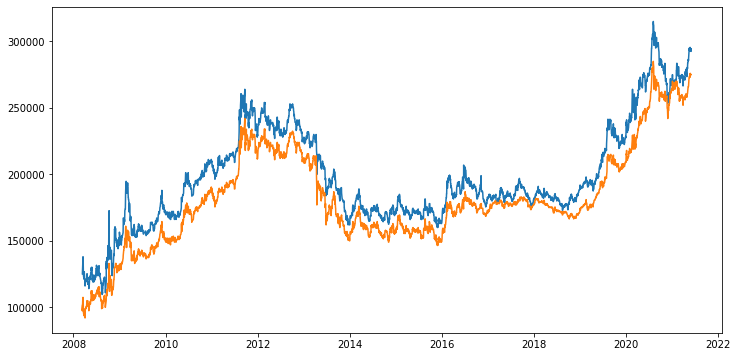

In [92]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(date_gold, gold24k['buy'])
ax.plot(date_gold, gold24k['sell_24k'])
#ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
plt.show()

[이벤트 데이터]

In [93]:
crisis_data = [
    (datetime(2008, 3, 13), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
    (datetime(2012, 12, 19), '18th President Election'),
    (datetime(2017, 5, 9), '19th President Election'),
    (datetime(2020, 2, 12), 'COVID-19 by WHO')
]

In [94]:
gold24k.head()

date     buy  sell_24k
0 2021-06-03  294500    275000
1 2021-06-02  292500    275000
2 2021-06-01  293500    275000
3 2021-05-31  293500    275000
4 2021-05-29  294500    275500

In [95]:
gold24k2 = gold24k.copy()

annotation의 좀더 손쉬운 적용을 위해 date 컬럼을 인덱스로 변환

In [96]:
gold24k2.set_index('date', inplace = True)

In [97]:
gold24k2.head(3)

buy  sell_24k
date                        
2021-06-03  294500    275000
2021-06-02  292500    275000
2021-06-01  293500    275000

In [98]:
# sorted index 필요
gold24k2.asof(gold24k['date'][0])

ValueError: asof requires a sorted index

### [시각화 최종]

asof() 메서드 적용을 위해 gold24k2 데이터프레임을 날짜 인덱스에 대해 오름차순 정렬한다

In [99]:
gold24k3 = gold24k2.sort_index(ascending = True)

In [100]:
gold24k3.head(3)

buy  sell_24k
date                        
2008-03-12  125180     97600
2008-03-12  125180     97600
2008-03-13  128370    100500

In [101]:
gold24k3['buy'].asof(datetime(2008,3,13))

128370

In [102]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name

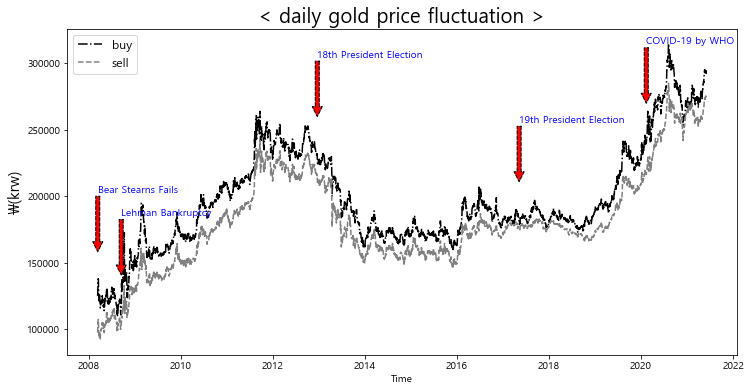

In [103]:
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(gold24k3.index, gold24k3['buy'], c = 'k', ls = '-.', label = 'buy')
ax.plot(gold24k3.index, gold24k3['sell_24k'], c='gray', ls = '--', label = 'sell')

for date, event in crisis_data:
    ax.annotate(event, xy=(date, gold24k3['buy'].asof(date) + 30000),
                xytext=(date, gold24k3['buy'].asof(date) + 80000),
                arrowprops=dict(facecolor='red', headwidth=10, width=4,
                                headlength=10, ls = '--'),
                horizontalalignment='left', verticalalignment='top', c='b', fontsize = 10)
#ax.set_xlim([datetime(2007, 1, 1), datetime(2011, 1, 1)])
ax.set_title('< daily gold price fluctuation >', fontsize = 20)
ax.set_xlabel('Time')
ax.set_ylabel("\\(krw)", fontsize = 15)
ax.legend(loc = 2, fontsize = 12)
plt.show()